<a href="https://colab.research.google.com/github/trivendrakulhare/MNIST_Digit_classification/blob/master/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import required libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


from tensorflow.keras.datasets import mnist


In [2]:
# Loading the Data, mnist.load_data() returns 2 tupels, one for training(total 60_000 samples) and one for test(total 10_000 samples)

(x_train, y_train), (x_test, y_test ) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Converting intensity of image to range 0 to 1.

x_train = x_train/255.0
x_test = x_test/255.0

In [0]:
# Reshapping the image

x_train = x_train.reshape(60_000, 28,28,1)
x_test = x_test.reshape(10_000, 28,28,1)


In [0]:
input_shape= x_train[0].shape

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation= 'relu', input_shape = input_shape))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(10, activation = 'softmax'))


In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
batch_size = 100
epoch = 5



model.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])




In [11]:
history = model.fit(x_train, y_train, batch_size= batch_size, epochs= epoch, verbose= 2, validation_data= (x_test, y_test))

Epoch 1/5
600/600 - 136s - loss: 0.1219 - accuracy: 0.9639 - val_loss: 0.0463 - val_accuracy: 0.9855
Epoch 2/5
600/600 - 135s - loss: 0.0762 - accuracy: 0.9770 - val_loss: 0.0345 - val_accuracy: 0.9894
Epoch 3/5
600/600 - 135s - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0283 - val_accuracy: 0.9904
Epoch 4/5
600/600 - 135s - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 5/5
600/600 - 136s - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0292 - val_accuracy: 0.9902


In [12]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 6s 20ms/step - loss: 0.0292 - accuracy: 0.9902


[0.029188746586441994, 0.9901999831199646]

## Plotting learning curve

In [0]:
def plot_learningCurve(history, epochs):
    # Plot training and validation accuracy values
    epoch_range =  range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()
    
    
    
    # Plot training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper_left')
    plt.show()
    
    


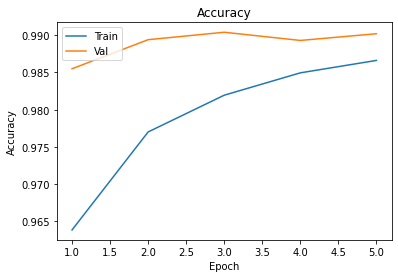

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


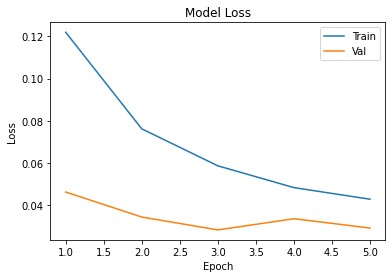

In [14]:
plot_learningCurve(history, 5)